In [1]:
from cyvcf2 import VCF
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_union_vcf(files):
    union_variants = set()

    for vcf_file in files:
        vcf_reader = VCF(vcf_file)
        variants_in_file = set()

        for variant in vcf_reader:
            variants_in_file.add((variant.CHROM, variant.POS, variant.REF, variant.ALT[0]))

        union_variants.update(variants_in_file)

    return union_variants


def create_binary_matrix(vcf_files, union_variants):
    num_files = len(vcf_files)
    num_variants = len(union_variants)

    # Initialize a binary matrix with zeros
    binary_matrix = np.zeros((num_files, num_variants), dtype=int)

    for i, vcf_file in enumerate(vcf_files):
        vcf_reader = VCF(vcf_file)
        variants_in_file = [(variant.CHROM, variant.POS, variant.REF, variant.ALT[0]) for variant in vcf_reader]
        for j, variant in enumerate(union_variants):
            # Check if the variant is present in the current VCF file
            if variant in variants_in_file:
                binary_matrix[i, j] = 1

    return binary_matrix

In [14]:
vcf_files = ['./mutect2/norecal-bowtie-mutect-filtered.vcf', './mutect2/recal-bowtie-mutect-filtered.vcf', './mutect2/norecal-bwa-mutect-filtered.vcf', 
             './mutect2/recal-bwa-mutect-filtered.vcf', './strelka/norecal-bowtie-strelka-filtered.vcf', './strelka/recal-bowtie-strelka-filtered.vcf', 
             './strelka/norecal-bwa-strelka-filtered.vcf', './strelka/recal-bwa-strelka-filtered.vcf', 
             './somatic/norecal-bowtie-somaticsniper-filtered.vcf', './somatic/recal-bowtie-somaticsniper-filtered.vcf',
              './somatic/norecal-bwa-somaticsniper-filtered.vcf', './somatic/recal-bwa-somaticsniper-filtered.vcf','hc_bed_filtered.recode.vcf']

union_variants = get_union_vcf(vcf_files)

binary_matrix = create_binary_matrix(vcf_files, union_variants)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

scaled = StandardScaler.transform(self=StandardScaler, X=binary_matrix)
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Create a DataFrame for visualization
import pandas as pd
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA Analysis - Pipeline Similarity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

TypeError: <class 'sklearn.preprocessing._data.StandardScaler'> is a class, not an instance.

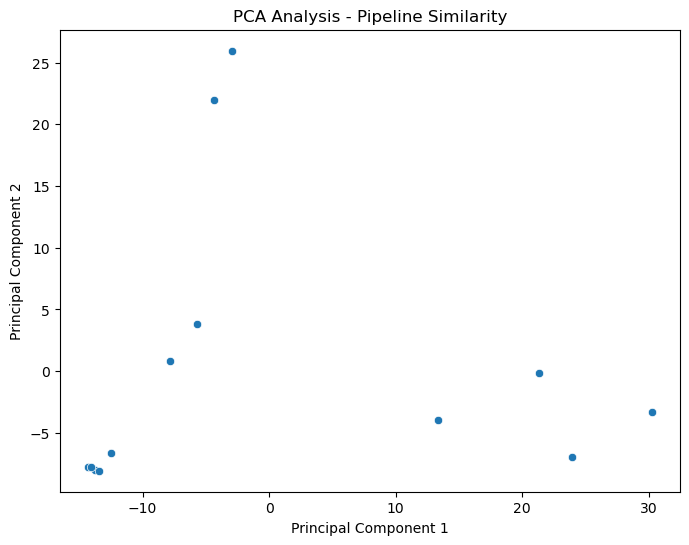

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

'''# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the binary matrix using StandardScaler
scaled_matrix = scaler.fit_transform(binary_matrix)
'''
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(binary_matrix)

# Create a DataFrame for visualization
import pandas as pd
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA Analysis - Pipeline Similarity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Explained Variance Ratio for PC1: 0.3753
Explained Variance Ratio for PC2: 0.2067


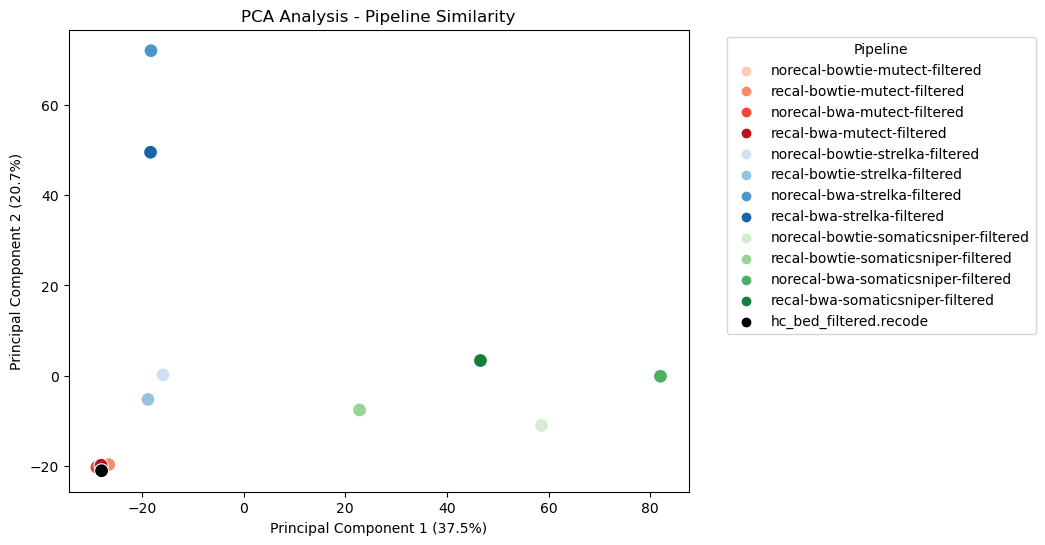

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of pipeline names and colors
pipeline_names = ['norecal-bowtie-mutect-filtered', 'recal-bowtie-mutect-filtered', 'norecal-bwa-mutect-filtered', 
                  'recal-bwa-mutect-filtered', 'norecal-bowtie-strelka-filtered', 'recal-bowtie-strelka-filtered', 
                  'norecal-bwa-strelka-filtered', 'recal-bwa-strelka-filtered', 
                  'norecal-bowtie-somaticsniper-filtered', 'recal-bowtie-somaticsniper-filtered',
                  'norecal-bwa-somaticsniper-filtered', 'recal-bwa-somaticsniper-filtered', 'hc_bed_filtered.recode']

# Create a color palette with unique colors for each pipeline
palette = {
    **dict(zip(pipeline_names[0:4], sns.color_palette("Reds", len(pipeline_names[0:4])))),
    **dict(zip(pipeline_names[4:8], sns.color_palette("Blues", len(pipeline_names[4:8])))),
    **dict(zip(pipeline_names[8:12], sns.color_palette("Greens", len(pipeline_names[8:12])))),
    **{pipeline_names[12]: "Black"}
}

# Instantiate StandardScaler and transform the binary matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(binary_matrix)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_matrix)

# Print explained variance ratio for PC1 and PC2
print(f"Explained Variance Ratio for PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Explained Variance Ratio for PC2: {pca.explained_variance_ratio_[1]:.4f}")

# Create a DataFrame for visualization
import pandas as pd
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add pipeline names to the DataFrame
df_pca['Pipeline'] = [pipeline_names[i] for i in range(len(pipeline_names)) for j in range(len(binary_matrix)//len(pipeline_names))]

# Plot the PCA results with colorized and named pipelines
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Pipeline', palette=palette, data=df_pca, s=100)
plt.title('PCA Analysis - Pipeline Similarity')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend(title='Pipeline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

[4.31541219e+01 2.09537010e+01 1.04999887e+01 8.08257380e+00
 6.77196380e+00 3.90109418e+00 1.94198923e+00 1.68463997e+00
 1.54882486e+00 8.87636848e-01 4.07569071e-01 1.65896562e-01
 3.98665315e-29]


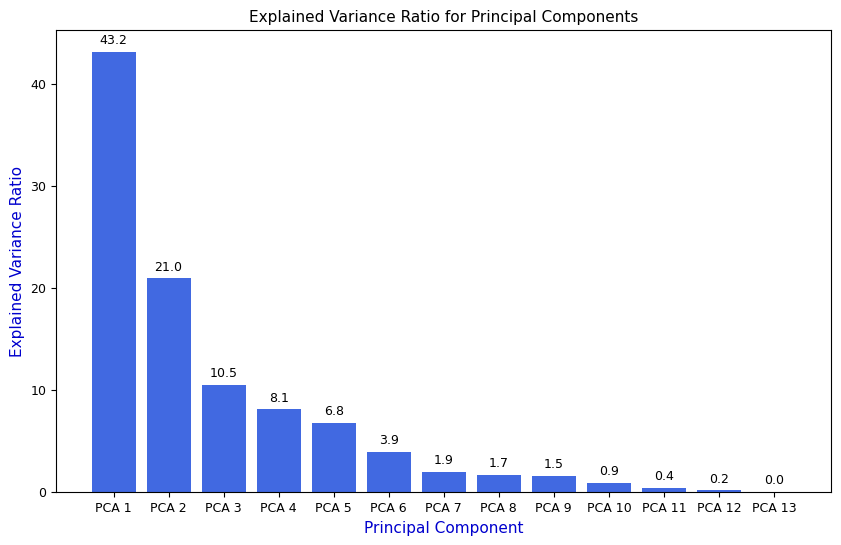

In [89]:
# Perform PCA
pca = PCA(n_components=len(vcf_files))
pca_result = pca.fit_transform(binary_matrix)

# Assuming pca is already defined
variance_ratios = np.empty(len(vcf_files))

for i in range(len(pca.explained_variance_ratio_)):
    variance_ratios[i] = pca.explained_variance_ratio_[i]*100

print(variance_ratios)

pca_names = [f'PCA {i+1}' for i in range(len(variance_ratios))]

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(pca_names, variance_ratios, color='royalblue')
plt.title('Explained Variance Ratio for Principal Components', fontsize=11)
plt.xlabel('Principal Component', fontsize=11, color='mediumblue')
plt.ylabel('Explained Variance Ratio', fontsize=11, color='mediumblue')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
for i, value in enumerate(variance_ratios):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', va='bottom', fontsize=9)
plt.show()

